In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


two_coupled_fhn_get_params (generic function with 1 method)

In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
# I0 = -1.70017; U0 = 0.26515 Барабан
# I0 = -1.7003; U0 = 0.26517 Барабан побольше
# I0 = -1.7012; U0 = 0.2652 большой временной перемежуток с перемежаемостью

In [6]:
#I0 = -1.7284; U0 = 0.26766 2 тип активности далеко от кривой

In [6]:
# 2 type of activity  I0 = -1.7158; U0 = 0.2661

# I0 = -1.7005; U0 = 0.26505 1 type of activity 
# 0.2662

I0 = -1.723; U0 = 0.282

p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [10.51889851040009, 0.7246860444367084, 0.4355746956126687];

In [7]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.282, 0.305, 0.3, -1.723]
 time:          0.0
 state:         [10.51889851040009, 0.7246860444367084, 0.4355746956126687]


In [8]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [9]:
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.390628454687537
 0.7368869703324222
 0.43046003481782397

In [10]:
prob_for = ODEProblem(TM, u0_1, (0.0, 1000), p) # SA[11.0, 0.4, 0.6]
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /home/sergey/.julia/packages/SciMLBase/QSc1r/src/integrator_interface.jl:579


In [11]:
# default
"""ts, tf = 20000, 200000 # 600000, 700000
# for time 20000, 200000 dt = 0.005
# for time 600000, 700000 dt = 0.001
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis)
            #yticks = [0.43, 0.45, 0.48])

#ax = LScene(f[1, 1])

#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.0, color = :black) # linewidth 3.0

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 20)
    text!(ep[idx], ep[idy], ep[idz],text = "SF(1,2)", fontsize = 35, align = (:right, :baseline))
end

display(f)"""

"ts, tf = 20000, 200000 # 600000, 700000\n# for time 20000, 200000 dt = 0.005\n# for time 600000, 700000 dt = 0.001\nidx, idy, idz = 1, 3, 2\nlb_size = 35; tck_size = 30;\ndis  = 60;\n\nCairoMakie.activate!()\nf = Figure(resolution = (900, 600))\nax = Axis3(f[1, 1], azimuth = 0.4p" ⋯ 558 bytes ⋯ ",\n    linewidth = 1.0, color = :black) # linewidth 3.0\n\nfor (i, ep) in enumerate(fp)\n    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 20)\n    text!(ep[idx], ep[idy], ep[idz],text = \"SF(1,2)\", fontsize = 35, align = (:right, :baseline))\nend\n\ndisplay(f)"

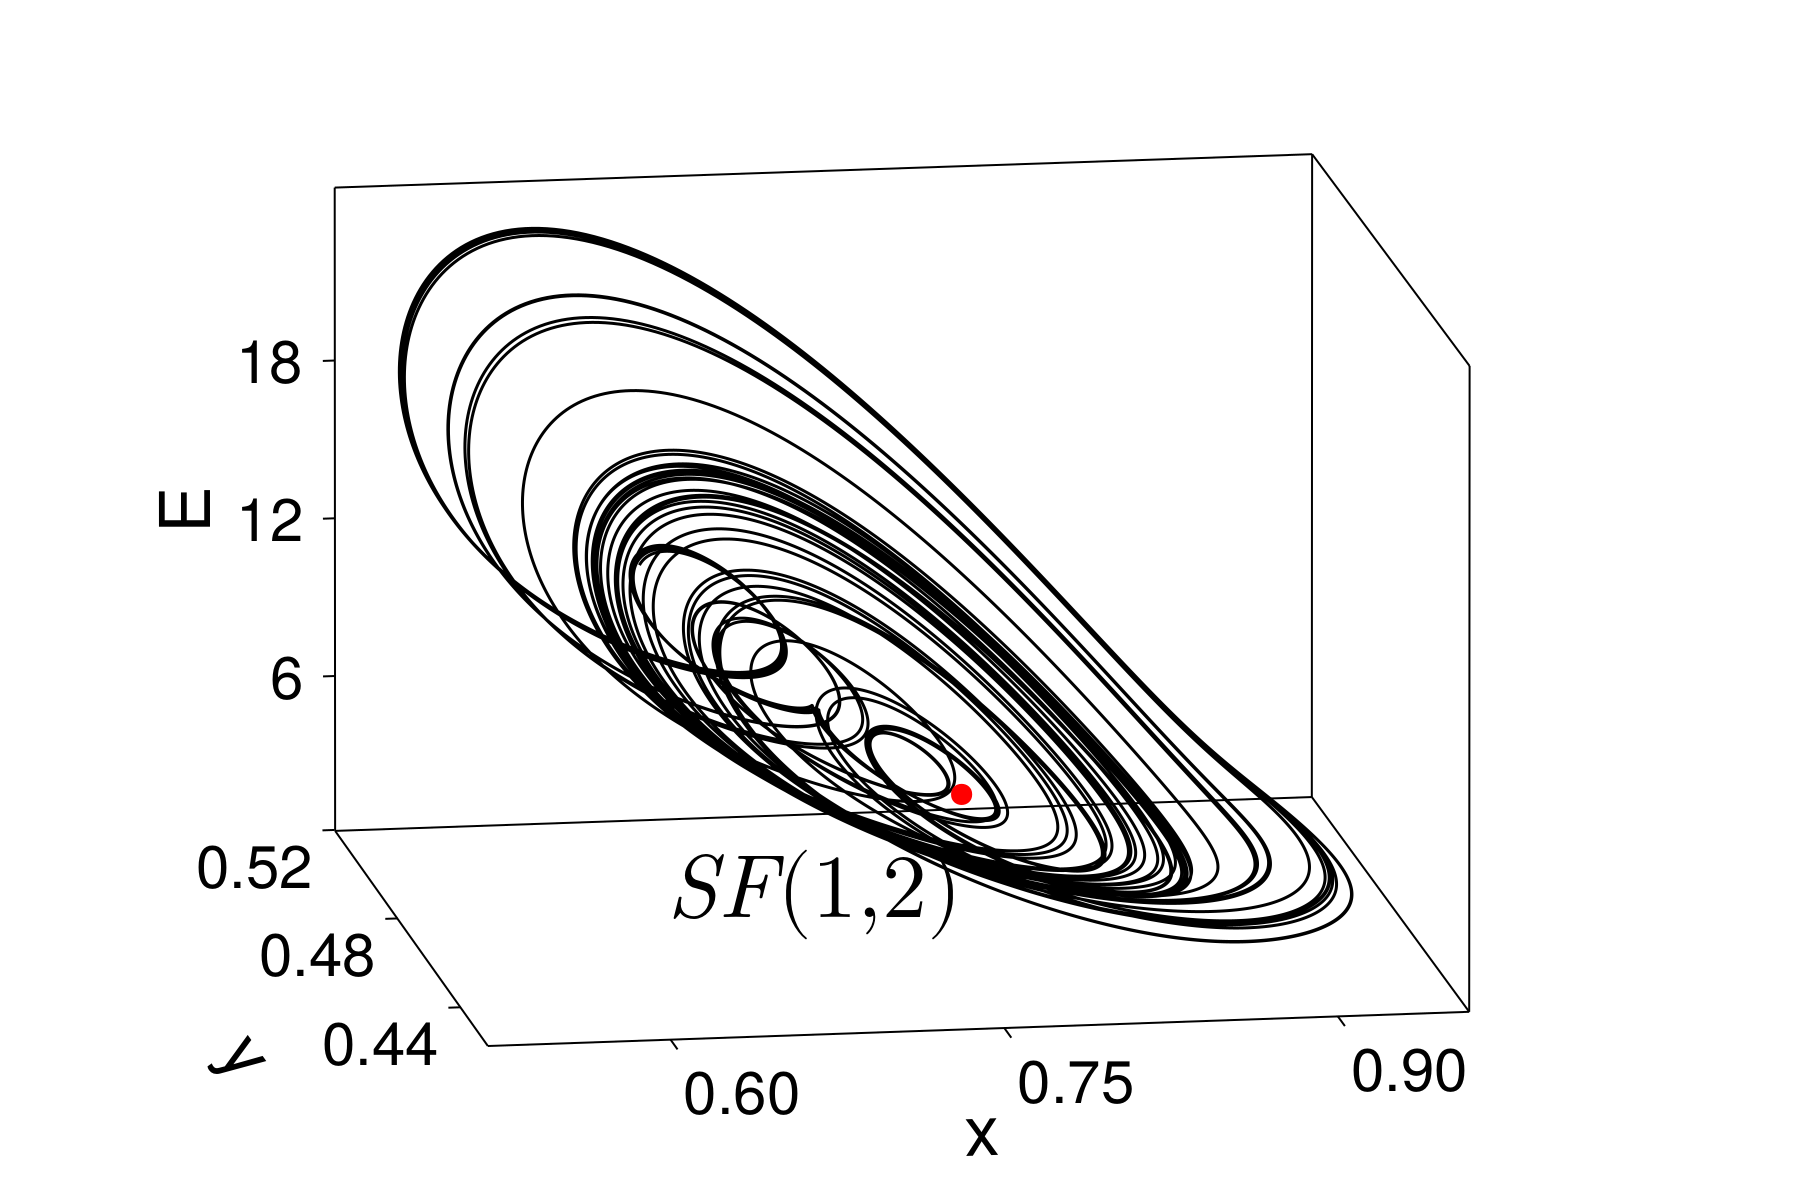

CairoMakie.Screen{IMAGE}


In [12]:
ts, tf = 960000, 994000 # 600000, 700000
# for time 20000, 200000 dt = 0.005
# for time 600000, 700000 dt = 0.001

idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 30;
disy = 80;
disz = 55;

CairoMakie.activate!()
f = Figure(size = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            xticks = [0.6, 0.75, 0.9], yticks = [0.44, 0.48, 0.52], zticks = [6, 12, 18])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

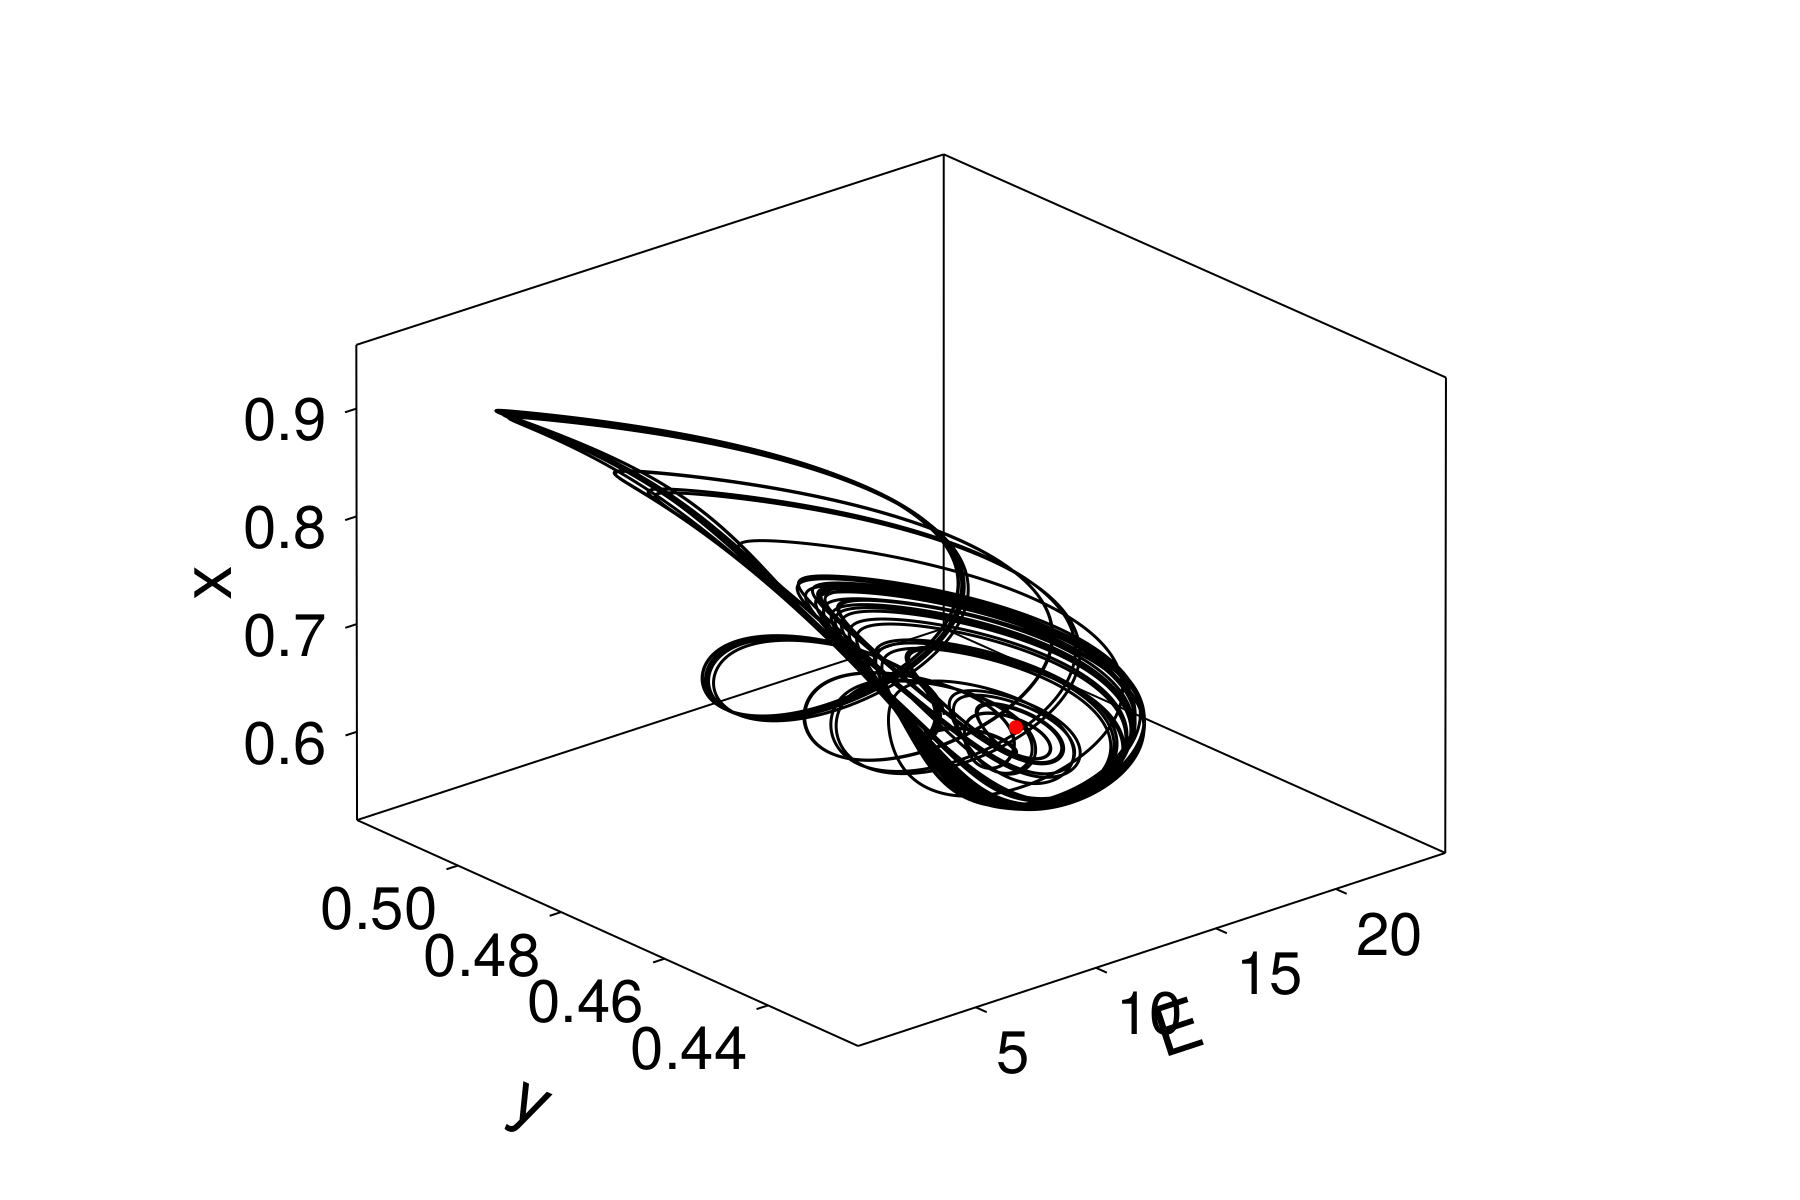

CairoMakie.Screen{IMAGE}


In [13]:
ts, tf = 960000, 994000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(size = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    #text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

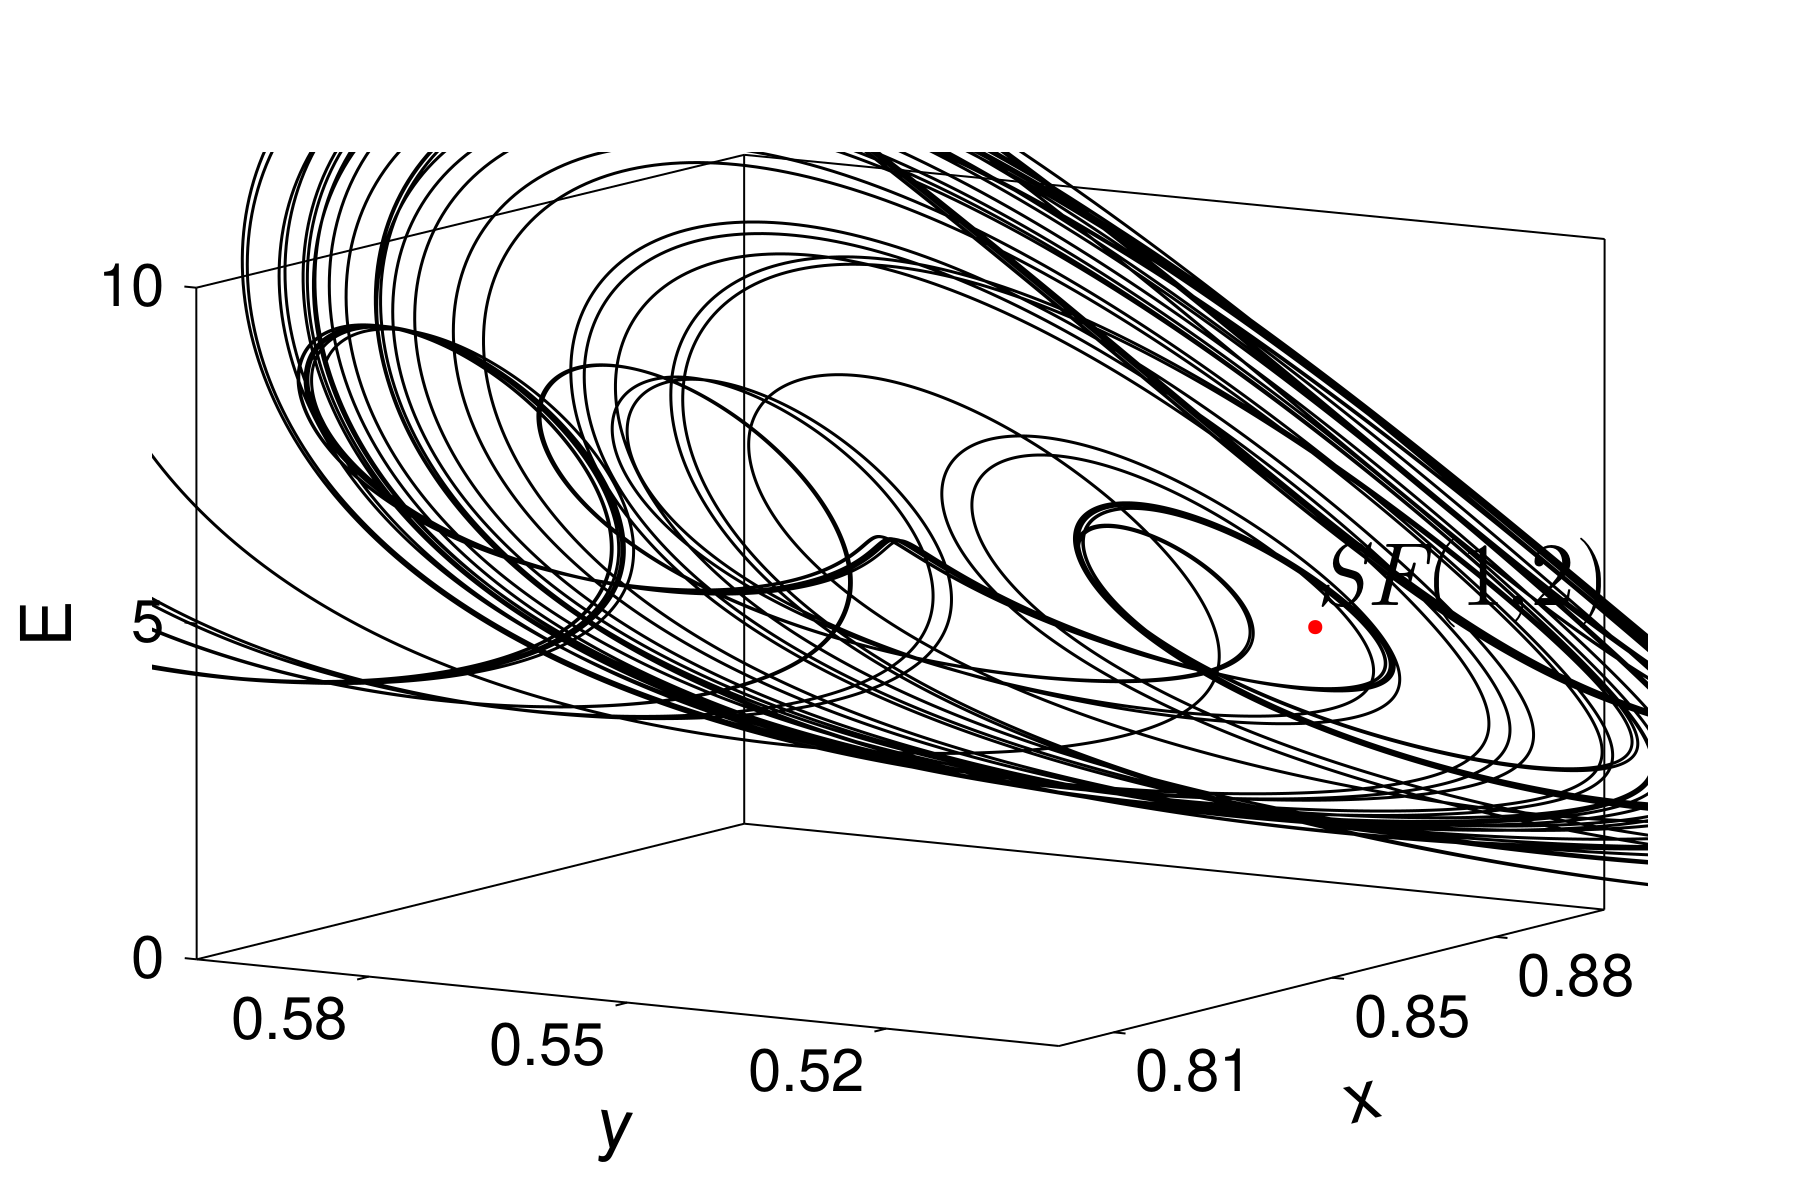

CairoMakie.Screen{IMAGE}


In [14]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 40;
disy = 40;
disz = 55;

CairoMakie.activate!()
f = Figure(size = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.82pi, elevation = 0.05pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz, xticks = [0.81, 0.85, 0.88], yticks = [0.52, 0.55, 0.58])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

xlims!(0.8, 0.9)
ylims!(0.5, 0.6)
zlims!(0, 10)

#xlims!(0.825, 0.875)
#ylims!(0.48, 0.53)
#zlims!(0, 10)

display(f)

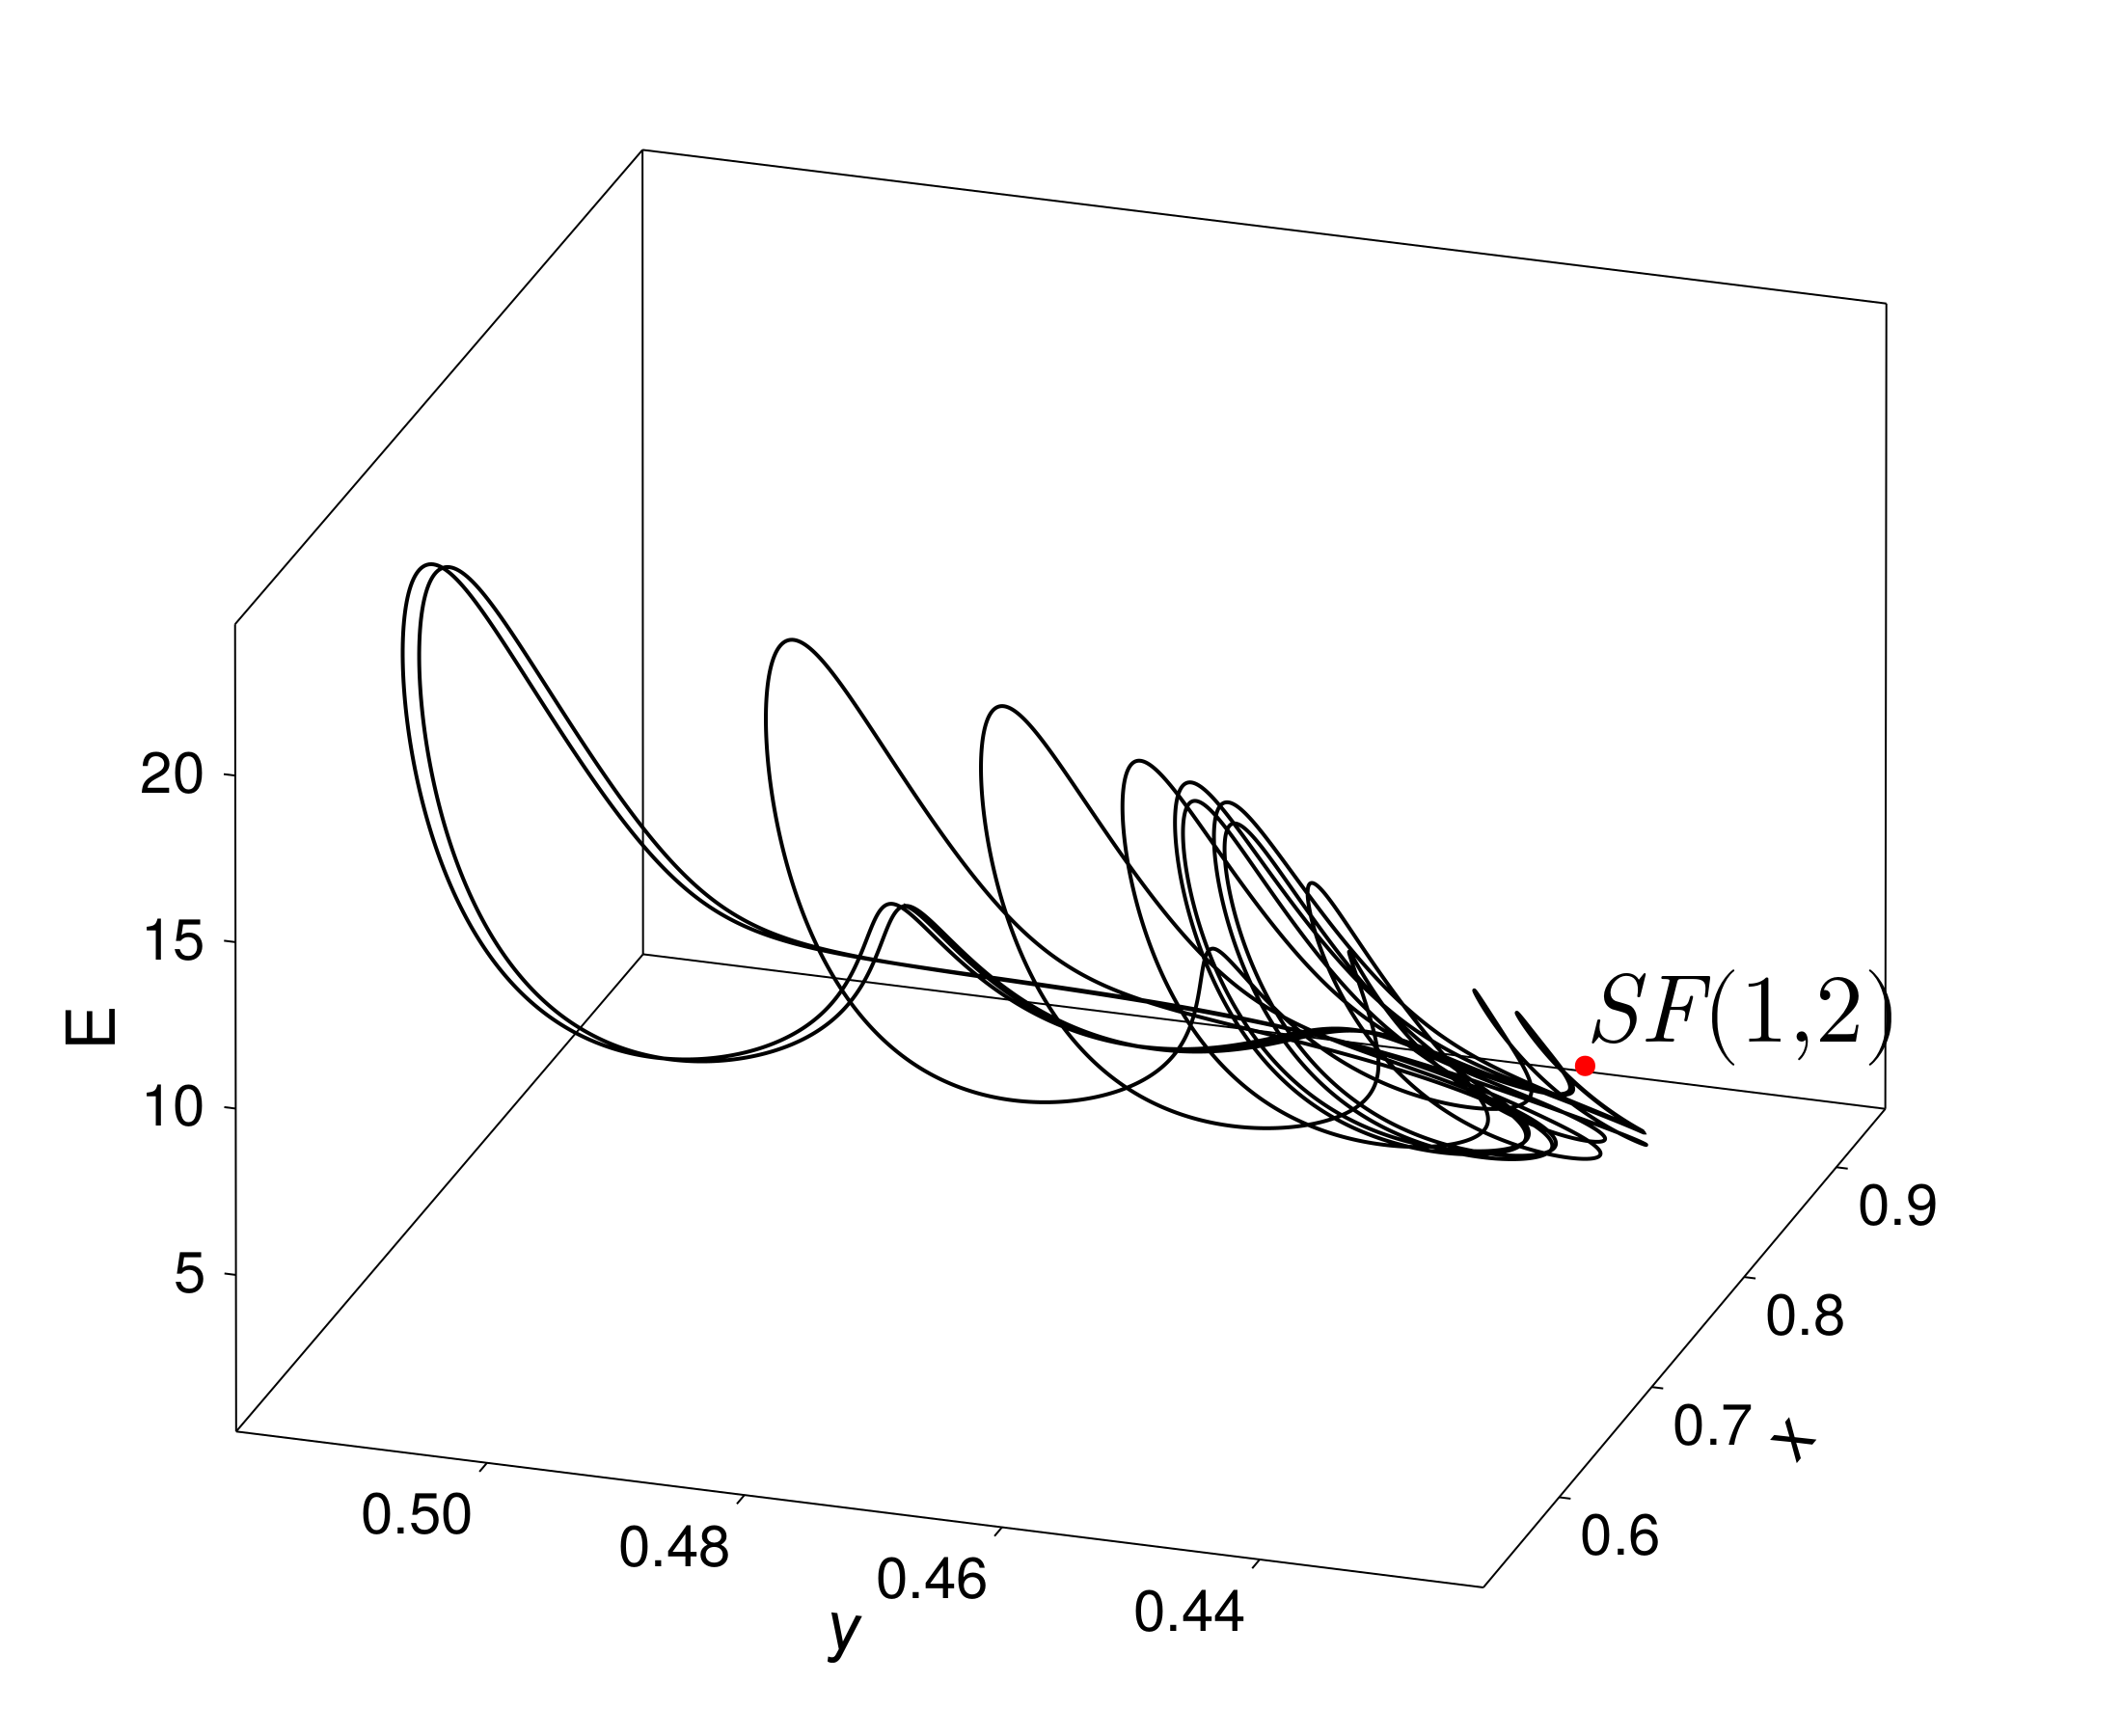

CairoMakie.Screen{IMAGE}


In [15]:
idx, idy, idz = 2, 3, 1
az = 1.1pi;
ts, tf = 960000, 970000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!(type = "svg", antialias = :best)

f = Figure(size = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 2.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 50, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

In [11]:
save("phase_chaotic_non_hom.eps", f)

CairoMakie.Screen{EPS}


In [20]:
idx, idy, idz = 2, 3, 1

GLMakie.activate!()
f = Figure(size = (900, 900))
ax = LScene(f[1, 1])
scale!(ax.scene, 50, 50, 1)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)
for (i, ep) in enumerate(fp)
        scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
end
display(GLMakie.Screen(), f)

GLMakie.Screen(...)

In [21]:
fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.390628354869737
 0.7368869762442518
 0.4304600336107281

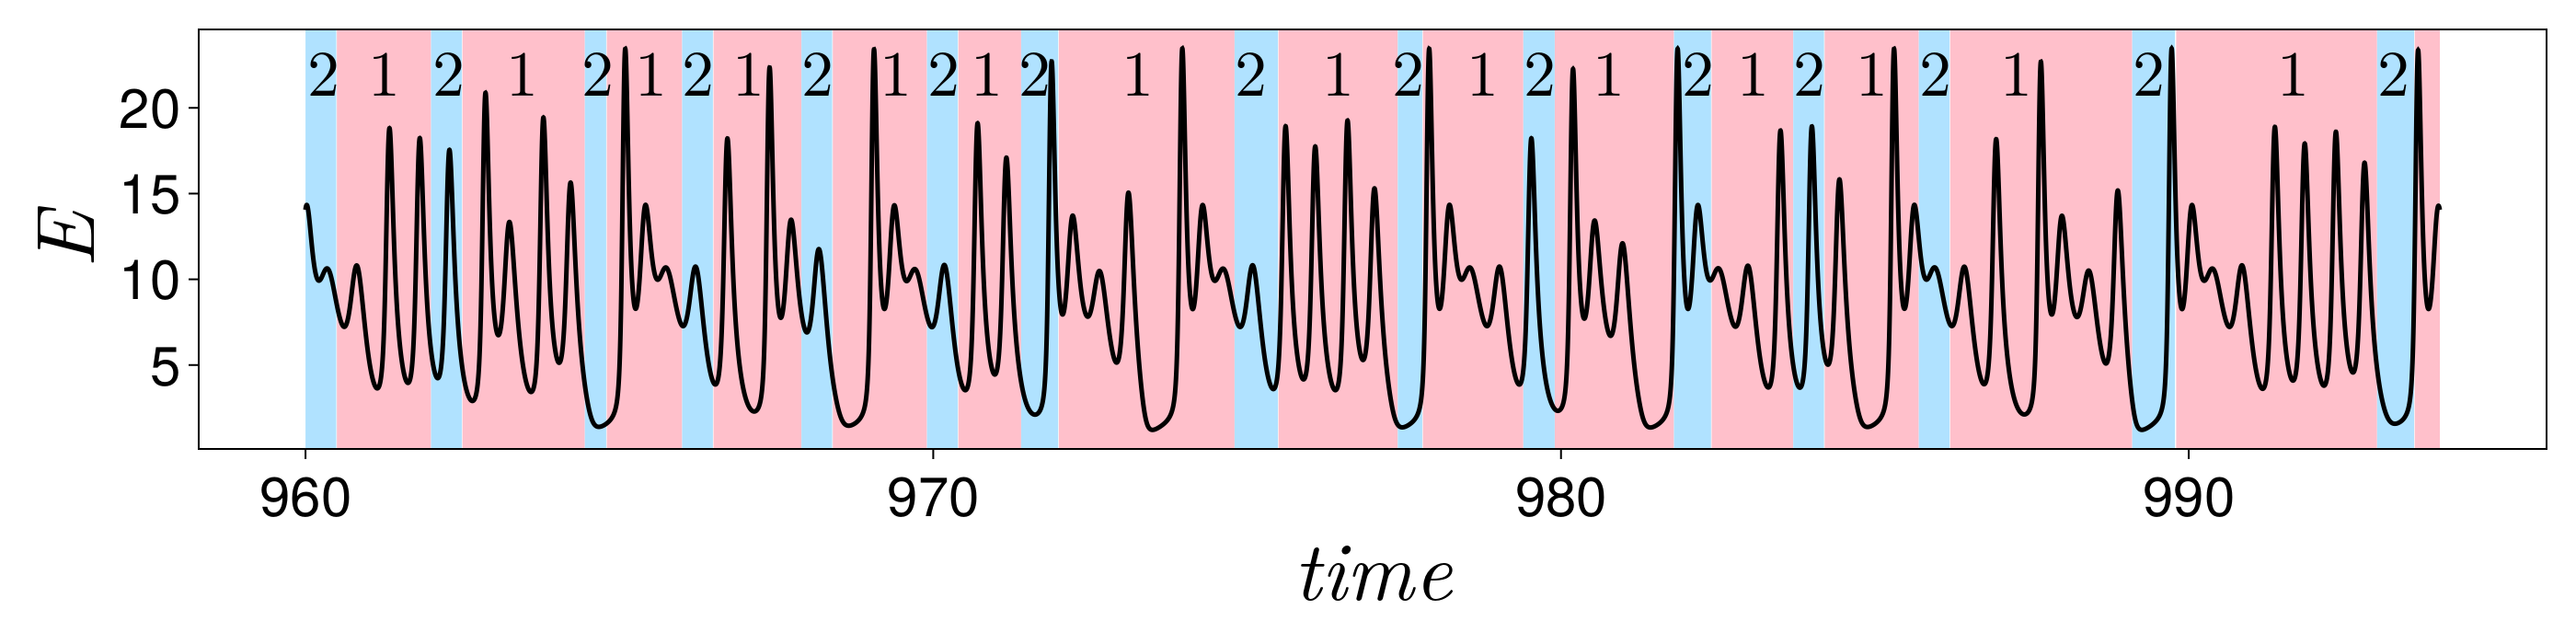

CairoMakie.Screen{IMAGE}


In [125]:
ts, tf = 960000, 994000 # 960000, 994000 # 500000, 580000
textsize = 35 


lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(size = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

pinkst = [960.5, 962.5, 964.8, 966.5, 968.4, 970.4,  972, 975.5, 977.8, 979.9, 982.4, 984.2, 986.2, 989.8, 993.6]
pinkend = [962.0, 964.45, 966.0, 967.9, 969.9, 971.4, 974.8, 977.4, 979.4, 981.8, 983.7, 985.7, 989.1, 993, 994]

bluest = [960, 962.0, 964.45, 966.0, 967.9, 969.9, 971.4, 974.8, 977.4, 979.4, 981.8, 983.7, 985.7, 989.1, 993]
bluend = [960.49, 962.49, 964.79, 966.49, 968.39, 970.39, 971.99, 975.49, 977.79, 979.9, 982.39, 984.19, 986.19, 989.78, 993.59]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)

text!(axis, 961.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 963.2, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 965.24, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 966.8, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 969.14, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 970.6, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 973.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 976.2, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 978.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 980.5, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 982.8, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 984.7, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 987.0, 20,  text = L"1", fontsize = textsize, color = :black)
text!(axis, 991.4, 20,  text = L"1", fontsize = textsize, color = :black)
#text!(axis, 993.6, 20,  text = L"1", fontsize = textsize, color = :black)







text!(axis, 960.03, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 962.02, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 964.4, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 966., 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 967.9, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 969.9, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 971.35, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 974.8, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 977.31, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 979.4, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 981.92, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 983.7, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 985.7, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 989.1, 20,  text = L"2", fontsize = textsize, color = :black)
text!(axis, 993, 20,  text = L"2", fontsize = textsize, color = :black)





lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)

display(f)

In [127]:
save("timeseries_chaotic_non_hom.eps", f)

CairoMakie.Screen{EPS}
